<a href="https://colab.research.google.com/github/kondalraop/What-drives-the-price-of-a-car/blob/main/prompt_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM.  After reading the overview, answer the questions below.

### **Business Understanding**

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

A used car dealership is a business that purchases vehicles, repairs or refurbishes them as needed, and resells them at a profit. The core strategy involves buying cars at a low price and selling them at a higher price. To ensure faster inventory turnover and maximize profits, several factors must be considered—such as vehicle condition, market demand, demographics, features, and model type. Using a dataset of 426,000 used car sales records, I will guide the dealer through a series of detailed reports. These insights will support informed decision-making and help identify the best opportunities for successful sales.

### **Data Understanding**

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

After undersatand the business requirement, First step is understand the dataset provided. Dataset used into my process has 426K sale records of used cars.

1. Import dataset
2. Identify each column and Column type
3. Identfy missing vales
4. remove or adjust missing values
5. Trasnform catagorical columns
6. Identify relations of columns by executing correlations
7. Analyse the each column importance with price

In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
import plotly.express as px



In [2]:
#Import the dataset

cars_df = pd.read_csv('/content/sample_data/vehicles.csv')
cars_df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [3]:
#Check the data type of each feature
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [4]:
#Description of the number data types
cars_df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [5]:
#Check unique values for each feature
unique = cars_df.nunique(axis = 0)
unique

,0
id,426880
region,404
price,15655
year,114
manufacturer,42
model,29649
condition,6
cylinders,8
fuel,5
odometer,104870


In [6]:
#Check the number of null values
cars_df.isnull().sum()

,0
id,0
region,0
price,0
year,1205
manufacturer,17646
model,5277
condition,174104
cylinders,177678
fuel,3013
odometer,4400


In [7]:
#Check null feature null values in percenatage
cars_df.isna().sum()/cars_df.shape[0]*100

,0
id,0.000000
region,0.000000
price,0.000000
year,0.282281
manufacturer,4.133714
model,1.236179
condition,40.785232
cylinders,41.622470
fuel,0.705819
odometer,1.030735


<Axes: >

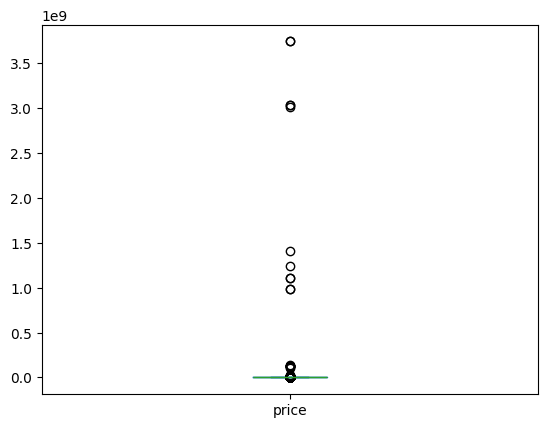

In [8]:
#Price Outlier
cars_df['price'].describe()
cars_df['price'].plot.box()

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

Identify feature which are not required for model
remove below features
size Feature is missing over 70%
dataset is already indexed so Id and VIN number are redundant
Model is nt correctly registred

In [9]:
# Drop 'model','size','id','VIN' features
#Clean the data. remove the columns not required for data model and drop the records where price is zero, Manufacturer is blank, year make is blank
cars_data = cars_df.drop(['id', 'VIN', 'region', 'model'], axis=1)
#remove rows missing price
cars_data = cars_data[cars_df['price'] !=0 ]
#remove rows missing manufacturer and year
cars_data = cars_data.dropna(subset=['manufacturer', 'year'], how='all')

In [10]:
##replace NaN with some default values
cars_data['type'] = cars_data['type'].fillna('unknown_type')
cars_data['cylinders'] = cars_data['cylinders'].fillna('unknown_cyl')
cars_data['condition'] = cars_data['condition'].fillna('unknown_cond')
cars_data['fuel'] = cars_data['fuel'].fillna('unknown_fuel')
cars_data['title_status'] = cars_data['title_status'].fillna('unknown_title')
cars_data['transmission'] = cars_data['transmission'].fillna('unknown_trans')
cars_data['drive'] = cars_data['drive'].fillna('unknown_drive')
cars_data['size'] = cars_data['size'].fillna('unknown_size')
cars_data['paint_color'] = cars_data['paint_color'].fillna('unknown_color')
cars_data.dropna(inplace=True)
cars_data
cars_data.isna().mean() * 100

,0
price,0.0
year,0.0
manufacturer,0.0
condition,0.0
cylinders,0.0
fuel,0.0
odometer,0.0
title_status,0.0
transmission,0.0
drive,0.0


In [11]:
#Change data types
cars_data['odometer'] = cars_data['odometer'].astype('int')
cars_data['year'] = cars_data['year'].astype('int')
cars_data['title_status'] = cars_data['title_status'].astype('string')
cars_data['transmission'] = cars_data['transmission'].astype('string')
cars_data['fuel'] = cars_data['fuel'].astype('string')
cars_data['state'] = cars_data['state'].astype('string')


In [12]:
#check each feature non missing values
cars_data.count()

,0
price,375619
year,375619
manufacturer,375619
condition,375619
cylinders,375619
fuel,375619
odometer,375619
title_status,375619
transmission,375619
drive,375619


Text(0.5, 0.98, 'Year is Left Skewed')

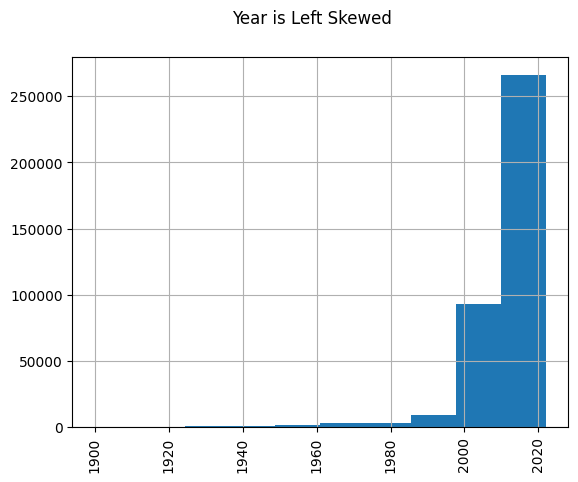

In [13]:
#Check the data distribution
cars_data['year'].hist()
pl.xticks(rotation='vertical')
pl.suptitle("Year is Left Skewed")

Text(0.5, 0.98, 'Price is Right Skewed with Outliers')

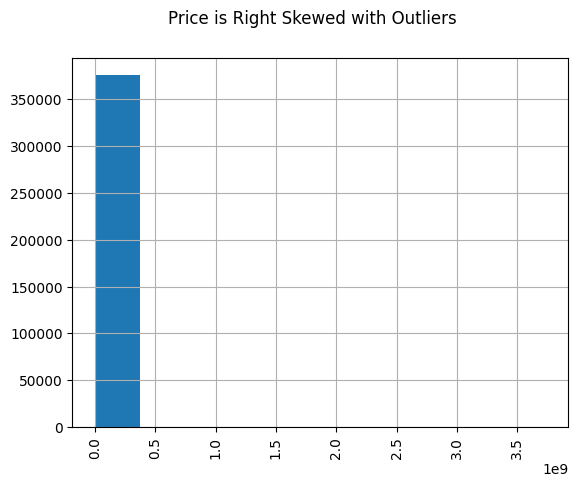

In [14]:
cars_data['price'].hist()
pl.xticks(rotation='vertical')
pl.suptitle("Price is Right Skewed with Outliers")

Text(0.5, 0.98, 'Odometer is Right Skewed with Outliers')

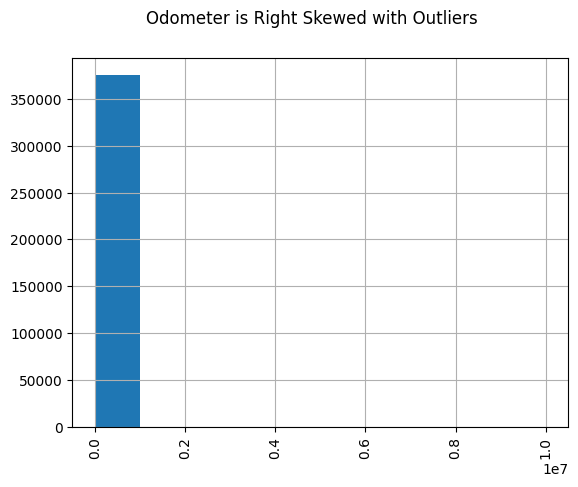

In [15]:
cars_data['odometer'].hist()
pl.xticks(rotation='vertical')
pl.suptitle("Odometer is Right Skewed with Outliers")

Text(0.5, 0.98, 'manufacturer is Right Skewed with Outliers')

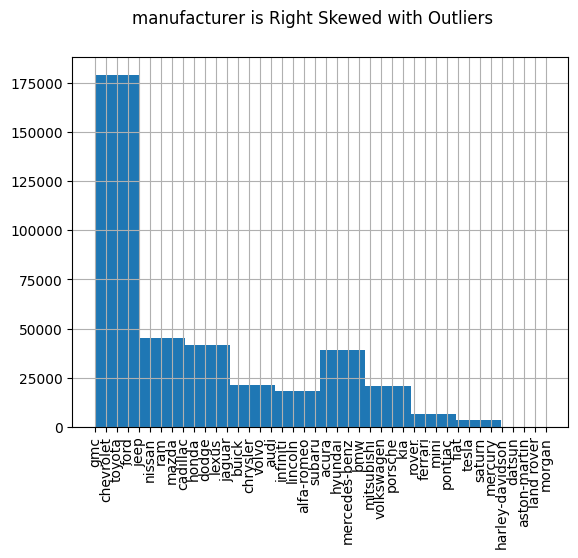

In [16]:
cars_data['manufacturer'].hist()
pl.xticks(rotation='vertical')
pl.suptitle("manufacturer is Right Skewed with Outliers")

Text(0.5, 0.98, 'Size is Right Skewed with Outliers')

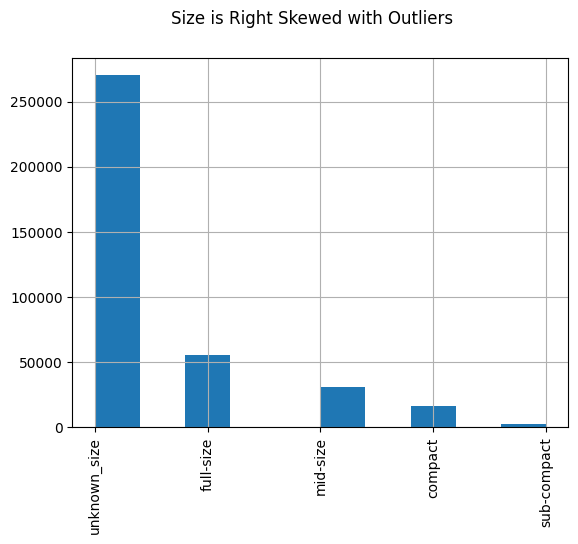

In [17]:
cars_data['size'].hist()
pl.xticks(rotation='vertical')
pl.suptitle("Size is Right Skewed with Outliers")

In [18]:
def remove_outliers_mean_std(df, column, n_std=3):
    #Removes outliers from a DataFrame based on mean ± n * std.
    #Returns a new DataFrame with outliers removed.
    mean = df[column].mean()
    std = df[column].std()
    lower_bound = mean - n_std * std
    upper_bound = mean + n_std * std
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [19]:
#Check cars price std and mean and number cars sold > 100000
std = cars_data['price'].std()
mean = cars_data['price'].mean()
print(std, mean)
cars_data[cars_data['price']>100000].count()

12983816.664632505 83781.4214669652


,0
price,456
year,456
manufacturer,456
condition,456
cylinders,456
fuel,456
odometer,456
title_status,456
transmission,456
drive,456


In [26]:
cars_data = remove_outliers_mean_std(cars_data, 'price', n_std=3)
std = cars_data['price'].std()
mean = cars_data['price'].mean()
print(std, mean)
cars_data[cars_data['price']>100000].count()

14775.198815555197 18859.727793626145


,0
price,346
year,346
manufacturer,346
condition,346
cylinders,346
fuel,346
odometer,346
title_status,346
transmission,346
drive,346


In [27]:
std = cars_data['year'].std()
mean = cars_data['year'].mean()

print(std, mean)


6.1444459923983965 2012.2133084594027


In [28]:
cars_data = remove_outliers_mean_std(cars_data, 'year', n_std=3)
std = cars_data['year'].std()
mean = cars_data['year'].mean()
print(std, mean)

5.554460569308034 2012.522710300719


In [29]:
std = cars_data['odometer'].std()
mean = cars_data['odometer'].mean()

print(std, mean)



63228.030058088276 92695.26444418113


In [30]:
cars_data = remove_outliers_mean_std(cars_data, 'odometer', n_std=3)
std = cars_data['odometer'].std()
mean = cars_data['odometer'].mean()
print(std, mean)

60771.58276160528 91369.61232271616


Text(0.5, 1.0, 'Odometer: Right-Skewed after Outlier Removal')

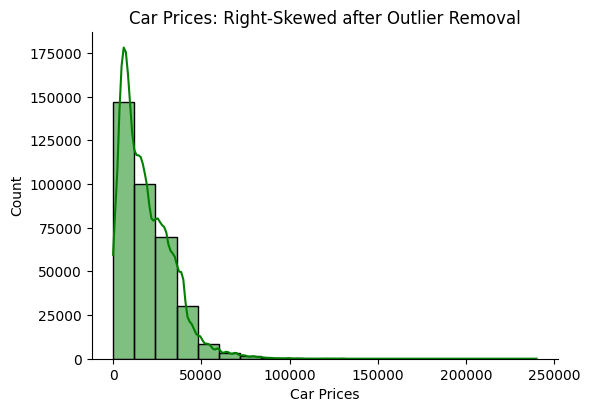

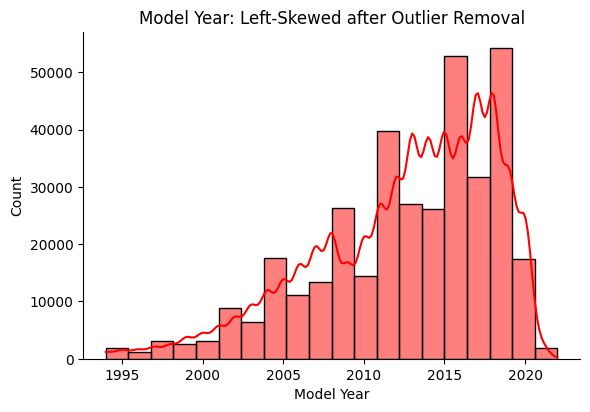

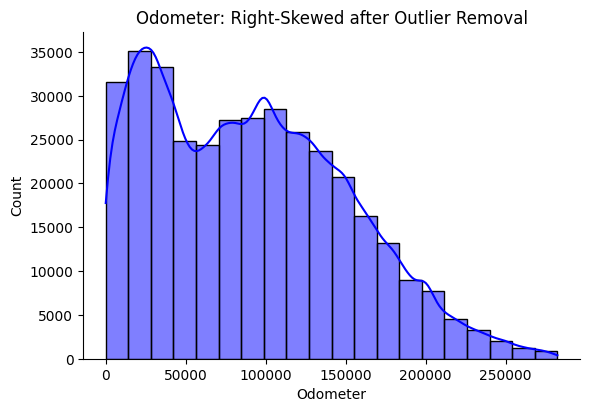

In [31]:
sns.displot(cars_data['price'], bins=20, color='green', kde=True, height=4, aspect=1.5)
plt.xlabel("Car Prices")
plt.title("Car Prices: Right-Skewed after Outlier Removal")

sns.displot(cars_data['year'],bins=20,color='red', kde=True, height=4, aspect=1.5)
plt.xlabel("Model Year")
plt.title("Model Year: Left-Skewed after Outlier Removal")

sns.displot(cars_data['odometer'],bins=20,color='blue', kde=True, height=4, aspect=1.5)
plt.xlabel("Odometer")
plt.title("Odometer: Right-Skewed after Outlier Removal")

In [32]:
#Describe after remove outliers
cars_data.describe()

,price,year,odometer
count,360862.000000,360862.000000,360862.000000
mean,19042.936508,2012.569500,91369.612323
std,14792.088430,5.520539,60771.582762
min,1.000000,1994.000000,0.000000
25%,7500.000000,2009.000000,38070.000000
50%,15900.000000,2014.000000,87000.000000
75%,27990.000000,2017.000000,134443.500000
max,239995.000000,2022.000000,282365.000000


In [33]:
# random sample of data to perform pairplot and observe potential correlations and distributions within the dataset
cars_sample = cars_data[['price', 'year','odometer', 'manufacturer','type']]
cars_sample = cars_sample.sample(n = 10000, random_state =1)
cars_sample


,price,year,odometer,manufacturer,type
41338,2500,2005,99000,toyota,sedan
253359,14995,2008,128013,ford,other
229971,17995,2012,142279,chevrolet,SUV
322226,42997,2018,52768,ford,pickup
118082,32990,2018,30562,mercedes-benz,other
...,...,...,...,...,...
92957,40500,2015,94291,toyota,pickup
166305,12679,2013,100048,ford,SUV
82457,5995,2012,164519,dodge,sedan
51938,8700,2011,84000,subaru,unknown_type


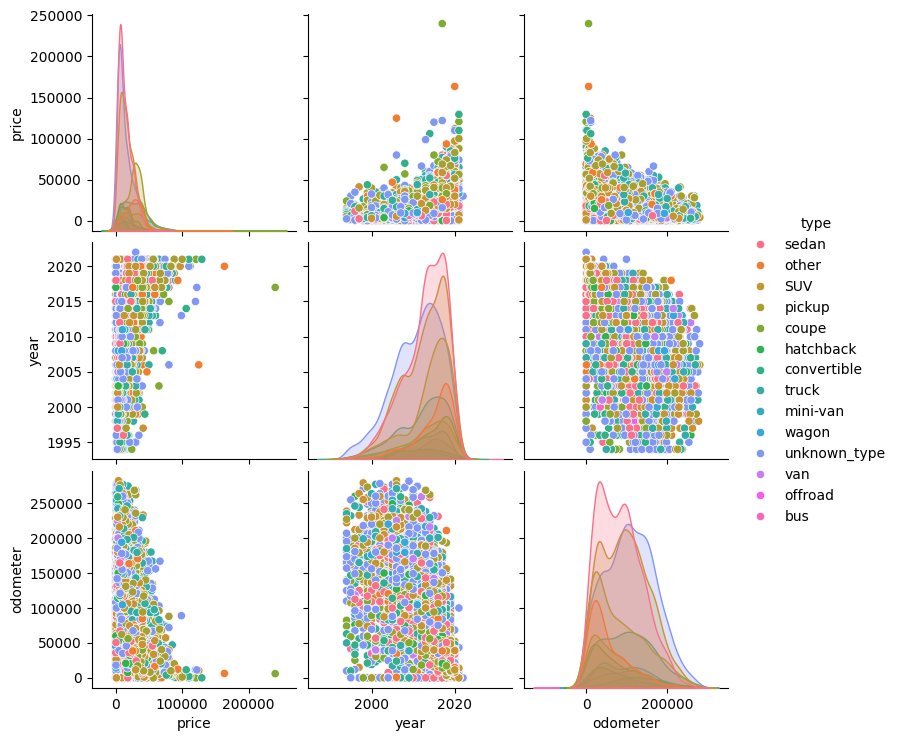

In [34]:
#Perform a pairplot
sns.pairplot(cars_sample, hue = 'type')

<Axes: >

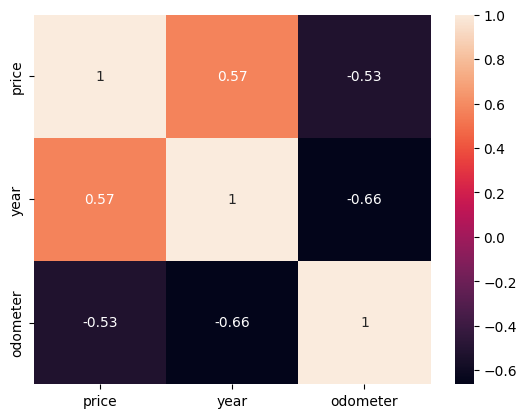

In [35]:
#Create a correlation Heatmap for numeric value features
corr=cars_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import warnings

def root_mean_squared_error (y_actual, y_predicted):
    return np.sqrt(mean_squared_error(y_actual, y_predicted))

In [37]:
# split the data into training data and develoment data using
#Split the data for Features and Target

#X = cars_data.drop('price', axis = 1)
X = cars_data.drop(['price','manufacturer', 'fuel','title_status','transmission','state', 'condition', 'drive', 'type', 'cylinders',
            'paint_color', 'size'], axis=1) #Features
y = cars_data['price'] #Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X_train

,year,odometer
199451,2005,97000
176957,2013,41232
361894,1995,100000
169898,2017,45925
186977,2017,47000
...,...,...
142738,2011,167000
304818,2013,121776
156382,2018,51191
173578,2015,148601


In [40]:
#building pipelie for linear regression
pipe = Pipeline([
                ('normalize', QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)),
                ('model', LinearRegression())])

pipe

Pipeline(steps=[('normalize',
                 QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)),
                ('model', LinearRegression())])

In [41]:
pipe.fit(X_train, y_train)

preds_train = pipe.predict(X_train)
preds_test = pipe.predict(X_test)

base_train_rmse = root_mean_squared_error(y_train, preds_train)
base_test_rmse = root_mean_squared_error(y_test, preds_test)

print(f'Training RMSE: {base_train_rmse}')
print(f'Test RMSE: {base_test_rmse}')

Training RMSE: 11793.343713777378
Test RMSE: 11664.675968796222


In [42]:
#Lasso Model
# encode categorized columns, normalize, scale, feature select, and linreg:
col_transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary'), ['manufacturer', 'fuel','title_status',
                                                                               'transmission','state', 'condition',
                                                                               'drive', 'type', 'cylinders', 'paint_color',
                                                                               'size']),
                                          remainder='passthrough')


pipe = Pipeline([
                ('col_transformer', col_transformer),
                ('normalize', QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)),
                #('selector', SequentialFeatureSelector(Lasso(), n_features_to_select=4)),
                ('model', Lasso(alpha=0.5, tol=1e-2))])

pipe

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['manufacturer', 'fuel',
                                                   'title_status',
                                                   'transmission', 'state',
                                                   'condition', 'drive', 'type',
                                                   'cylinders', 'paint_color',
                                                   'size'])])),
                ('normalize',
                 QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)),
                ('model', Lasso(alpha=0.5, tol=0.01))])

In [43]:
X = cars_data.drop('price', axis = 1)

y = cars_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

pipe.fit(X_train, y_train)

lasso_preds_train = pipe.predict(X_train)
lasso_preds_test = pipe.predict(X_test)

lasso_train_mse = root_mean_squared_error(y_train, lasso_preds_train)
lasso_test_mse = root_mean_squared_error(y_test, lasso_preds_test)

print('Train Lasso RMSE: ', lasso_train_mse)
print('Test Lasso RMSE:  ', lasso_test_mse)

Train Lasso RMSE:  8818.91806379773
Test Lasso RMSE:   8804.75243478128


In [44]:
#Ridge regression
pipe = Pipeline([
                ('col_transformer', col_transformer),
                ('normalize', QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)),
                ('model', Ridge(alpha=0.5))])

pipe

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['manufacturer', 'fuel',
                                                   'title_status',
                                                   'transmission', 'state',
                                                   'condition', 'drive', 'type',
                                                   'cylinders', 'paint_color',
                                                   'size'])])),
                ('normalize',
                 QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)),
                ('model', Ridge(alpha=0.5))])

In [45]:
X = cars_data.drop('price', axis = 1)

y = cars_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

pipe.fit(X_train, y_train)

ridge_preds_train = pipe.predict(X_train)
ridge_preds_test = pipe.predict(X_test)

ridge_train_mse = root_mean_squared_error(y_train, ridge_preds_train)
ridge_test_mse = root_mean_squared_error(y_test, ridge_preds_test)

print('Train Ridge RMSE: ', ridge_train_mse)
print('Test Ridge RMSE:  ', ridge_test_mse)

Train Ridge RMSE:  8909.286390688138
Test Ridge RMSE:   8909.673444408712


In [46]:
pipe = Pipeline([
                ('col_transformer', col_transformer),
                ('normalize', QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)),
                ('model', LinearRegression())])

pipe

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['manufacturer', 'fuel',
                                                   'title_status',
                                                   'transmission', 'state',
                                                   'condition', 'drive', 'type',
                                                   'cylinders', 'paint_color',
                                                   'size'])])),
                ('normalize',
                 QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)),
                ('model', LinearRegression())])

In [47]:
X = cars_data.drop('price', axis = 1)

y = cars_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

pipe.fit(X_train, y_train)

linreg_preds_train = pipe.predict(X_train)
linreg_preds_test = pipe.predict(X_test)

linreg_train_mse = root_mean_squared_error(y_train, linreg_preds_train)
linreg_test_mse = root_mean_squared_error(y_test, linreg_preds_test)

print('Train LinReg RMSE: ', linreg_train_mse)
print('Test LinReg RMSE:  ', linreg_test_mse)

Train LinReg RMSE:  8818.57221950122
Test LinReg RMSE:   8804.746434343691


In [48]:
cars_reg = X_train.drop(['year', 'manufacturer', 'condition', 'fuel', 'odometer', 'title_status','transmission', 'drive', 'size',
                       'type', 'paint_color', 'state', 'cylinders'], axis=1)
cars_reg['price'] = y_train
cars_reg['Lasso'] = lasso_preds_train
cars_reg['Ridge'] = ridge_preds_train
cars_reg['LinReg'] = linreg_preds_train

In [49]:
cars_reg.head(10)


,price,Lasso,Ridge,LinReg
261206,23000,27922.420879,27138.024410,27882.328970
6407,28995,26622.184445,26051.867128,26745.946275
156969,13995,14538.679929,14658.178208,14559.425194
81984,6995,13985.076900,14306.951300,14020.399132
248978,25990,39676.888733,39311.632114,39888.189419
258550,5400,7880.529023,8682.512660,7827.107935
292969,5500,-2991.692837,-1466.386354,-2871.608018
374846,999,17682.313407,17541.215603,17538.703865
181009,25995,26095.839512,26265.279542,26088.795052
66463,8599,12716.680615,12945.496488,12681.490556


In [50]:
cars_reg = pd.DataFrame()
cars_reg['price'] = y_test
cars_reg['Lasso'] = ridge_preds_test
cars_reg['Ridge'] = ridge_preds_test
cars_reg['LinReg'] = linreg_preds_test
cars_reg.head(10)

,price,Lasso,Ridge,LinReg
145673,15990,18519.277836,18519.277836,17938.851082
205175,41990,31626.419775,31626.419775,32239.942921
165015,17900,20670.235974,20670.235974,20963.821003
99209,12540,17392.123503,17392.123503,17602.232875
20655,5995,22825.856827,22825.856827,22059.872423
155610,19500,21721.236841,21721.236841,20605.483671
38992,11899,14653.792803,14653.792803,14730.548048
408830,48995,35886.025584,35886.025584,36546.022072
258302,8690,4054.278395,4054.278395,4200.222999
175055,31990,29761.406827,29761.406827,29506.950315


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [51]:
# Best Features:
pipe = Pipeline([
                ('col_transformer', col_transformer),
                ('normalize', QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)),
                ('selector', SequentialFeatureSelector(Lasso(), n_features_to_select=10)),
                ('model', LinearRegression())])
pipe

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['manufacturer', 'fuel',
                                                   'title_status',
                                                   'transmission', 'state',
                                                   'condition', 'drive', 'type',
                                                   'cylinders', 'paint_color',
                                                   'size'])])),
                ('normalize',
                 QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)),
                ('selector',
                 SequentialFeatureSelector(estimator=Lasso(),
                                           n_features_to_select=10)),
                ('model', LinearRegression())])

In [52]:
X = cars_data.drop('price', axis = 1)

y = cars_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

pipe.fit(X_train, y_train)

feat_preds_train = pipe.predict(X_train)
feat_preds_test = pipe.predict(X_test)

feat_train_mse = root_mean_squared_error(y_train, feat_preds_train)
feat_test_mse = root_mean_squared_error(y_test, feat_preds_test)

print('Train LinReg Best 4 Features RMSE: ', feat_train_mse)
print('Test LinReg Best 4 Features RMSE:  ', feat_test_mse)

Train LinReg Best 4 Features RMSE:  9502.40502446438
Test LinReg Best 4 Features RMSE:   9500.382128203168


In [54]:
features = pipe.named_steps['col_transformer'].get_feature_names_out()
sel_features = pipe.named_steps['selector'].get_feature_names_out()
indexes = []
for s in sel_features:
    indexes.append(int(s[1:]))

features[indexes]

array(['onehotencoder__manufacturer_ferrari',
       'onehotencoder__fuel_diesel', 'onehotencoder__title_status_clean',
       'onehotencoder__drive_fwd', 'onehotencoder__drive_unknown_drive',
       'onehotencoder__type_pickup',
       'onehotencoder__cylinders_4 cylinders',
       'onehotencoder__cylinders_8 cylinders', 'remainder__year',
       'remainder__odometer'], dtype=object)

In [55]:
pipe = Pipeline([
                ('col_transformer', col_transformer),
                ('normalize', QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)),
                ('selector', SequentialFeatureSelector(Lasso(), n_features_to_select=4)),
                ('model', LinearRegression())])

pipe

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['manufacturer', 'fuel',
                                                   'title_status',
                                                   'transmission', 'state',
                                                   'condition', 'drive', 'type',
                                                   'cylinders', 'paint_color',
                                                   'size'])])),
                ('normalize',
                 QuantileTransformer(output_distribution='normal')),
                ('scaler', StandardScaler(with_mean=False)),
                ('selector',
                 SequentialFeatureSelector(estimator=Lasso(),
                                           n_features_to_select=4)),
                ('model', LinearRegression())])

In [56]:
X = cars_data.drop('price', axis = 1)

y = cars_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

param_dict = {'selector__n_features_to_select': [4, 5, 6]}

mygrid = GridSearchCV(estimator = pipe, param_grid=param_dict, n_jobs=-1)
mygrid.fit(X_train,y_train)

grid_preds_train = mygrid.predict(X_train)
grid_preds_test = mygrid.predict(X_test)

grid_train_mse = root_mean_squared_error(y_train, grid_preds_train)
grid_test_mse = root_mean_squared_error(y_test, grid_preds_test)

print('Train GridSearch RMSE: ', grid_train_mse)
print('Test GridSearch RMSE:  ', grid_test_mse)

Train GridSearch RMSE:  9945.558052285862
Test GridSearch RMSE:   9964.36709288536


In [57]:
best_selector = mygrid.best_estimator_.named_steps['selector']
best_selector.get_support()
pipe.named_steps['col_transformer'].get_feature_names_out()[best_selector.get_support()]

array(['onehotencoder__fuel_diesel', 'onehotencoder__drive_fwd',
       'onehotencoder__cylinders_4 cylinders',
       'onehotencoder__cylinders_8 cylinders', 'remainder__year',
       'remainder__odometer'], dtype=object)

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

After collecting, organizing and analyzing the data provided, used car dealer can make profits if he focus more on below featurs order.

Year - The newer is the better

Odometer - lesser the number of miles the beteer

Title - Clean title sells better

Transmission - NUmber of Cylenders

Type - SUV, pickup truck or AWD
